In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = 'https://github.com/hnrkljnsn/MachineLearning-Assignment2-DiabetesClassification/blob/main/diabetes_binary_classification_data.csv?raw=true'
data = pd.read_csv(url, index_col=0)

In [2]:
#1

In [3]:
data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,,,,,,,,,,,,,,,,,,,,,
0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
# Trouble showing Diabetes_binary column. Think it is beacuse Diabetes_binary is the index.
print(data.index.name)

Diabetes_binary


In [5]:
# Make Diabetes_binary column not index.
data.reset_index(inplace=True)
print(data.index.name)

None


In [6]:
#Show the new setup with a proper index instead of Diabetes_binary
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the correlations with the Diabetes_binary column/variable
diabetes_correlation = correlation_matrix['Diabetes_binary']
# Sort correlations by highest to lowest correlation
diabetes_correlation_sorted = diabetes_correlation.sort_values(ascending=False)

# Display correlations
print(diabetes_correlation_sorted)

Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64


In [8]:
#2 
#Gradient Boosting 

Gradient Boosting accuracy on feature importance:  0.8671029118048985
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     65605
         1.0       0.56      0.17      0.26     10499

    accuracy                           0.87     76104
   macro avg       0.72      0.57      0.59     76104
weighted avg       0.84      0.87      0.84     76104



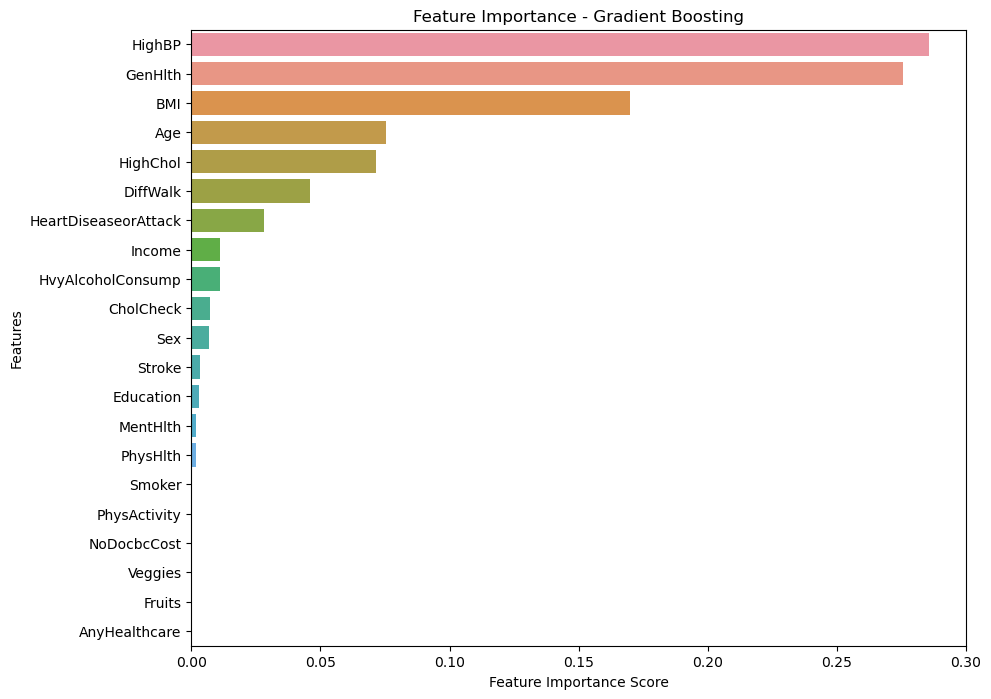

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Prepare the data
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

# Make predictions
y_pred = gbc.predict(X_test)

# Evaluate the model
print("Gradient Boosting accuracy on feature importance: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot Feature Importance
feature_importance = gbc.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]

plt.figure(figsize=(10, 8))
plt.title('Feature Importance - Gradient Boosting')
sns.barplot(x=feature_importance[sorted_idx], y=X.columns[sorted_idx])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [10]:
#3
#Gradient boosting on a subset of risk factors

In [11]:
# Defining the subset of features
features = ['HighBP', 'GenHlth', 'BMI', 'Age', 'HighChol']
X = data[features]
y = data['Diabetes_binary']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Gradient Boosting Classifier using the selected subset of features
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions and evaluate performance
y_pred = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Get a detailed classification report
print("Gradient Boosting accuracy using subset of risk factors: ",accuracy)
print(classification_report(y_test, y_pred))

Gradient Boosting accuracy using subset of risk factors:  0.8666430148218228
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.56      0.15      0.24      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.57      0.58     50736
weighted avg       0.83      0.87      0.83     50736



In [12]:
#4
#Using three different machine learing models to classify the disease.

In [13]:
#Gradient boosting

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

# Prepare the data (features X and target y)
X = data.drop('Diabetes_binary', axis=1) 
y = data['Diabetes_binary']  

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

# Predictions
y_pred = gbc.predict(X_test)

print("Gradient Boosting Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Gradient Boosting Accuracy:  0.8671029118048985
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     65605
         1.0       0.56      0.17      0.26     10499

    accuracy                           0.87     76104
   macro avg       0.72      0.57      0.59     76104
weighted avg       0.84      0.87      0.84     76104



In [15]:
from sklearn.ensemble import RandomForestClassifier

# Prepare the data 
X = data.drop('Diabetes_binary', axis=1)  
y = data['Diabetes_binary'] 

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy:  0.8593372227478188
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     65605
         1.0       0.47      0.17      0.25     10499

    accuracy                           0.86     76104
   macro avg       0.68      0.57      0.59     76104
weighted avg       0.82      0.86      0.83     76104



In [16]:
from sklearn.linear_model import LogisticRegression

# Prepare the data (features X and target y)
X = data.drop('Diabetes_binary', axis=1)  # Use all features except the target
y = data['Diabetes_binary']  # Target is whether the person has diabetes

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy:  0.8651582045621781
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     65605
         1.0       0.54      0.16      0.24     10499

    accuracy                           0.87     76104
   macro avg       0.71      0.57      0.59     76104
weighted avg       0.83      0.87      0.83     76104

